In [10]:
import cv2
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Utils.functions import createAnySymmetry,displayBoundingBox

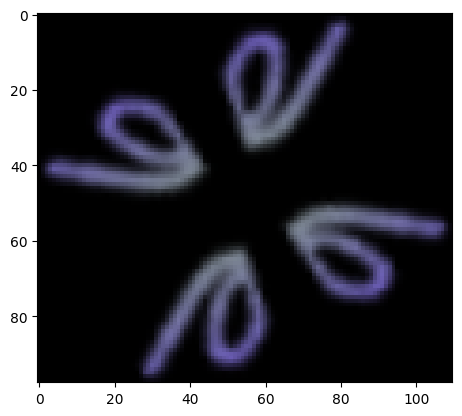

In [4]:
# Reading the database
mnist = pd.read_csv('MNIST/mnist_test.csv')

img, _ = createAnySymmetry(random.randint(0,10000), mnist, ['simple', 'cross'], [0.5, 0.5])

plt.imshow(img)

33.0


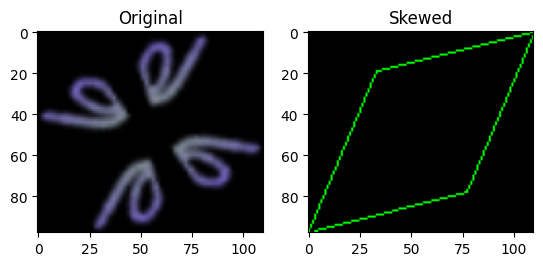

In [43]:
USE REAL POINTS


h, w, _ = img.shape

input_pts = np.float32([
    [0,0],
    [w,0],
    [w,h],
    [0,h]
])

skewPercX = 0.3
skewPercY = 0.2

print(((input_pts[0][0] + w*skewPercX)))

output_pts = np.float32([
    [(input_pts[0][0] + w*skewPercX), (input_pts[0][1] + h*skewPercY)],
    [w,0],
    [(input_pts[2][0] - w*skewPercX), (input_pts[2][1] - h*skewPercY)],
    [0,h]
])

skewed = np.zeros((h,w,3)).astype(np.uint8)

displayBoundingBox(skewed, output_pts)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img), ax[0].set_title(f'Original')
ax[1].imshow(skewed), ax[1].set_title('Skewed')
plt.show()

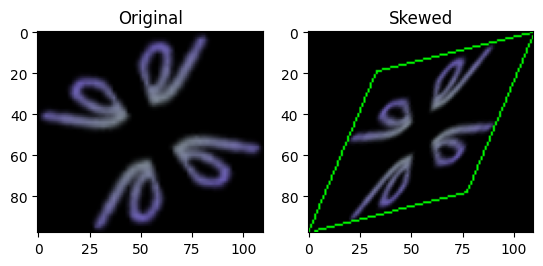

In [44]:
M = cv2.getPerspectiveTransform(input_pts, output_pts)
out = cv2.warpPerspective(img,M,(w,h),flags=cv2.INTER_LINEAR)
displayBoundingBox(out, output_pts)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img), ax[0].set_title(f'Original')
ax[1].imshow(out), ax[1].set_title('Skewed')
plt.show()